# Demonstration of FFT 

This will read a waveform from the sound device and then do a fast fourier transform.


In [1]:
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sounddevice as sd

# List all available audio devices
print(sd.query_devices())

# Or list only input-capable devices
devices = sd.query_devices()
devuse = 'HD Pro Webcam C920'
for i, dev in enumerate(devices):
    if dev['max_input_channels'] > 0:
        devname = dev['name']
        print(f"{i}: {devname}  (inputs: {dev['max_input_channels']})")
        if devname == devuse:
            devnum = i

if devnum:
    print(f'Using device number {devnum}')
else:
    print(f'Device {devuse} not found!')

  0 Crestron, Core Audio (0 in, 2 out)
  1 iPhone Microphone, Core Audio (1 in, 0 out)
> 2 HD Pro Webcam C920, Core Audio (2 in, 0 out)
  3 MacBook Pro Microphone, Core Audio (1 in, 0 out)
< 4 MacBook Pro Speakers, Core Audio (0 in, 2 out)
  5 Microsoft Teams Audio, Core Audio (1 in, 1 out)
  6 RemotePCMic, Core Audio (2 in, 2 out)
  7 RemotePCSound, Core Audio (2 in, 2 out)
1: iPhone Microphone  (inputs: 1)
2: HD Pro Webcam C920  (inputs: 2)
3: MacBook Pro Microphone  (inputs: 1)
5: Microsoft Teams Audio  (inputs: 1)
6: RemotePCMic  (inputs: 2)
7: RemotePCSound  (inputs: 2)
Using device number 2


Recording...
Done recording.


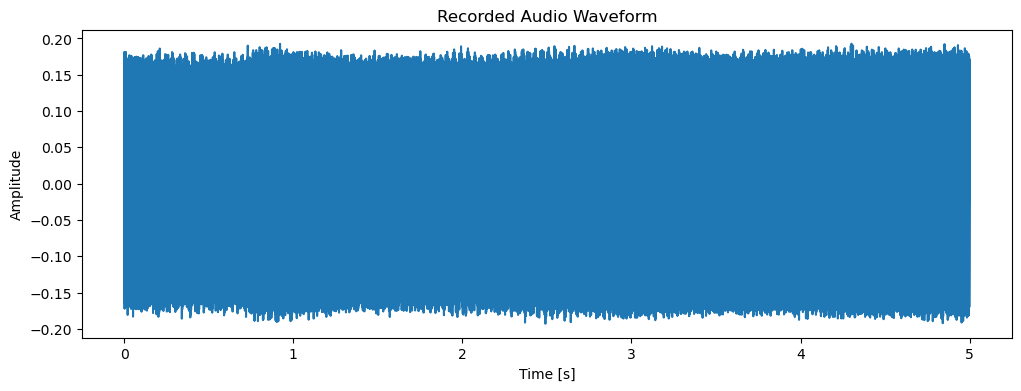

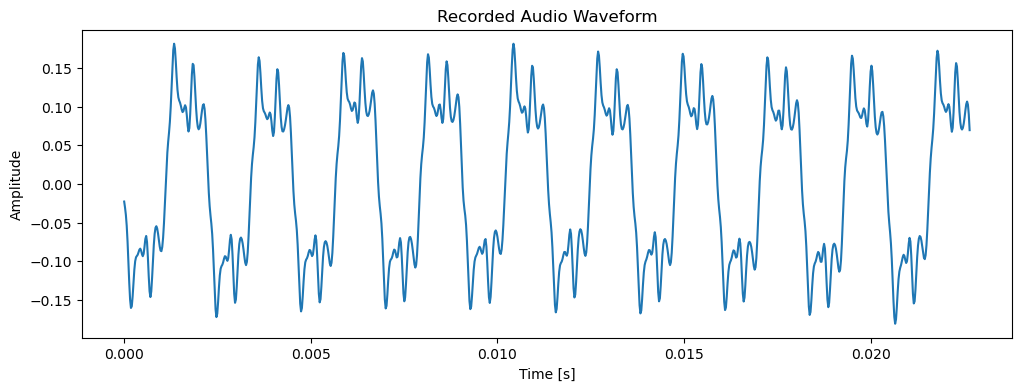

In [9]:
# ----------------------------
# Recording parameters
# ----------------------------
duration = 5.0       # seconds to record
fs = 44100            # sampling rate (standard)
channels = 1          # mono

print("Recording...")
# Be sure to select the webcam
audio = sd.rec(int(duration * fs), samplerate=fs, channels=channels,device=devnum)
sd.wait()
print("Done recording.")

# audio is a 2-D array (samples × channels); flatten to 1-D
audio = audio.flatten()

# for some reason, the beginning of the clip has problems

#audio = audio[10000:]

# ----------------------------
# Time-domain plot
# ----------------------------
t = np.arange(len(audio)) / fs

# Plot the full waveform
plt.figure(figsize=(12, 4))
plt.plot(t, audio)
plt.title("Recorded Audio Waveform")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

# Plot the first 1000 points
plt.figure(figsize=(12, 4))
plt.plot(t[:1000], audio[:1000])
plt.title("Recorded Audio Waveform")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [10]:
# ----------------------------
# FFT
# ----------------------------
N = len(audio)
fft_vals = np.fft.fft(audio)         # positive freq FFT
print(f'{N} samples gave {len(fft_vals)} of type {fft_vals.dtype}')
# convert to power
s = np.abs(fft_vals)**2

220500 samples gave 220500 of type complex64


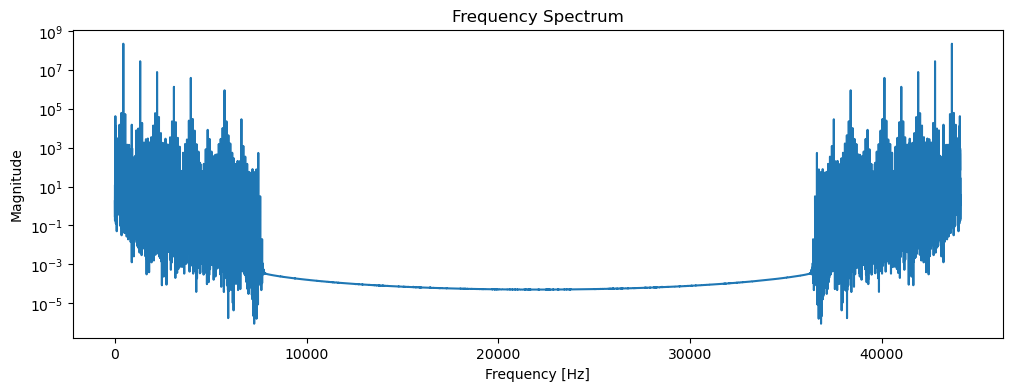

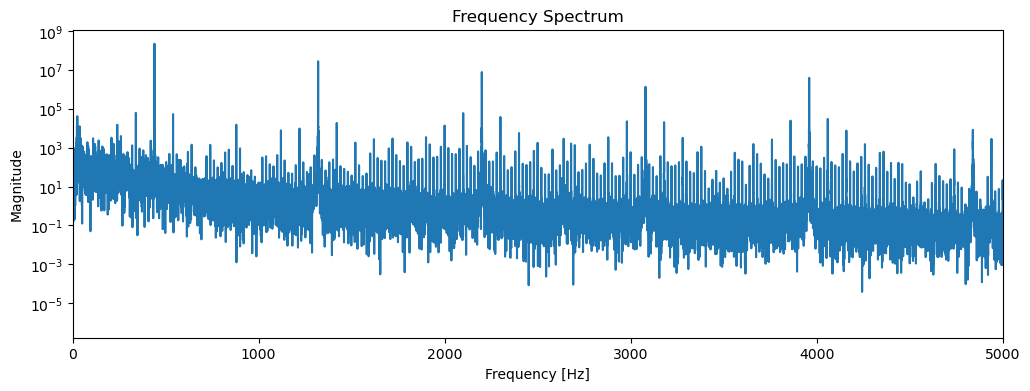

In [11]:
# ----------------------------
# Frequency-domain plot
# ----------------------------
freqs = np.arange(len(s))/duration
plt.figure(figsize=(12, 4))
# Full spectrum, including mirror values
plt.plot(freqs, s)
plt.title("Frequency Spectrum")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.yscale('log')
plt.show()
# Up do 5 kHz
plt.figure(figsize=(12, 4))

plt.plot(freqs, s)
plt.title("Frequency Spectrum")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.yscale('log')
plt.xlim(0.,5000.)
plt.show()
